<a href="https://colab.research.google.com/github/qiutongshi/clusteranalysis_birthrate_python/blob/main/MiniProject_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries & Data Prep

Clean data sets to prepare for cluster analysis and final project 

In [ ]:
import pandas as pd
import statistics as sta
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import skew
from functools import reduce
import sklearn

from google.colab import files

df_brth = pd.read_csv('https://raw.githubusercontent.com/qiutongshi/study-of-teen-birth-at-Bal/main/Teen_Birth_Rate_per_1%252C000_Females__aged_15-19_.csv')
df_his = pd.read_csv('https://raw.githubusercontent.com/qiutongshi/study-of-teen-birth-at-Bal/main/Percent_of_Residents_-_Hispanic.csv')
df_pov = pd.read_csv('https://raw.githubusercontent.com/qiutongshi/study-of-teen-birth-at-Bal/main/Percent_of_Family_Households_Living_Below_the_Poverty_Line.csv')
df_other = pd.read_csv('https://raw.githubusercontent.com/qiutongshi/study-of-teen-birth-at-Bal/main/Percent_of_Residents_other.csv')

In [ ]:
# clean irrelevant data

del df_brth["SHAPE_Length"]
del df_brth["SHAPE_Area"]
del df_brth["OBJECTID"]
del df_brth["teenbir10"]
del df_brth["teenbir11"]
del df_brth["teenbir12"]
del df_brth["teenbir13"]
del df_brth["teenbir14"]
del df_brth["teenbir18"]

del df_pov["SHAPE_Length"]
del df_pov["SHAPE_Area"]
del df_pov["FID"]
del df_pov["hhpov18"]


del df_his["FID"]
del df_his["phisp10"]
del df_his["phisp18"]
del df_his["SHAPE_Length"]
del df_his["SHAPE_Area"]

del df_other["OBJECTID"]
del df_other["ppac10"]
del df_other["ppac18"]
del df_other["SHAPE_Length"]
del df_other["SHAPE_Area"]

In [ ]:
#new file merged

data_frames =[df_brth,df_pov,df_his,df_other,]
df_merge = reduce(lambda left,right: pd.merge(left,right,on=["CSA2010"], how="left"), data_frames).fillna('void')


df_merge.to_csv("merged_data.csv", index = False)
files.download("merged_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#seperating labels and data for cluster analysis
df_label = df_merge["CSA2010"]
del df_merge["CSA2010"]

# Cluster Analysis

Using different cluster analysis in Python and plot the results to see whether cluster analysis is necessary for final project. Data used are from 2015, 2016, 2017.

In [ ]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot

#convert data frame into data set
# Convert DataFrame to matrix
mat = df_merge.values

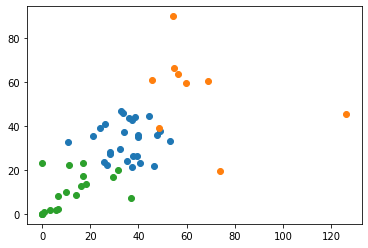

In [ ]:
from sklearn.cluster import KMeans

# Using sklearn
km = sklearn.cluster.KMeans(n_clusters=3)
km.fit(mat)
# Get cluster assignment labels
labels = km.labels_
# Format results as a DataFrame
results = pd.DataFrame([df_merge.index,labels]).T
# assign a cluster to each example
yhat = km.predict(mat)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(mat[row_ix, 0], mat[row_ix, 1])
# show the plot
pyplot.show()

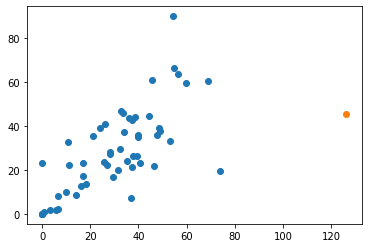

In [ ]:
# affinity propagation clustering
from sklearn.cluster import AffinityPropagation

# define the model
ap = AffinityPropagation(damping=0.9)
# fit the model
ap.fit(mat)
# assign a cluster to each example
yhat = ap.predict(mat)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(mat[row_ix, 0], mat[row_ix, 1])
# show the plot
pyplot.show()

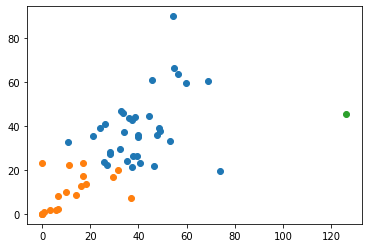

In [ ]:
# agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# define the model
ac = AgglomerativeClustering(n_clusters=3)
# fit model and predict clusters
yhat = ac.fit_predict(mat)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(mat[row_ix, 0], mat[row_ix, 1])
# show the plot
pyplot.show()

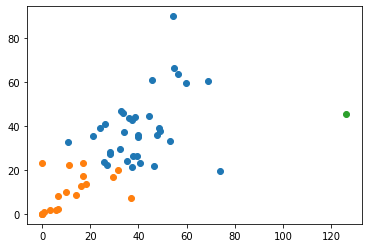

In [ ]:
#BIRCH clustering
from sklearn.cluster import Birch

# define the model
birch = Birch(threshold=0.01, n_clusters=3)
# fit the model
birch.fit(mat)
# assign a cluster to each example
yhat = birch.predict(mat)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(mat[row_ix, 0], mat[row_ix, 1])
# show the plot
pyplot.show()

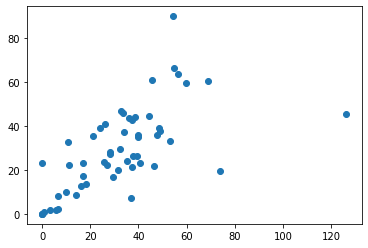

In [ ]:
#DBSCAN clustering
from sklearn.cluster import DBSCAN

# define the model
dbscan = DBSCAN(eps=0.30, min_samples=9)
# fit model and predict clusters
yhat = dbscan.fit_predict(mat)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(mat[row_ix, 0], mat[row_ix, 1])
# show the plot
pyplot.show()

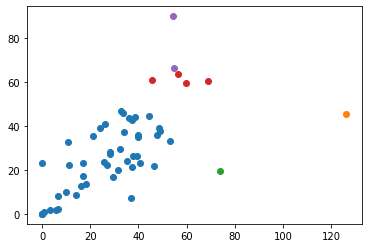

In [ ]:
#mean shift clustering
from sklearn.cluster import MeanShift

# define the model
ms = MeanShift()
# fit model and predict clusters
yhat = ms.fit_predict(mat)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(mat[row_ix, 0], mat[row_ix, 1])
# show the plot
pyplot.show()

Conclusion: some clustering method works better than others in Python. 3 clustering seems to be a good number for the cluster groups used later in Excel cluster analysis. Note that some clustering method tests(unrelevant to this project) suggests that more data is needed for better clustering.